# <u><center>Linear Regression<u>

Linear Regression is a statistical technique which is used to find the linear relationship between dependent and one or more independent variables. This technique is applicable for Supervised learning Regression problems where we try to predict a continuous variable.

Linear Regression can be further classified into two types – Simple and Multiple Linear Regression. In this project, I employ Simple Linear Regression technique where I have one independent and one dependent variable. It is the simplest form of Linear Regression where we fit a straight line to the data.

# <u>Table of contents<u>

1. Import Libraries
2. Load Data
3. Data Analysis
4. Data Preprocessing
5. Train Model
6. Test Model on `x_test`
7. Calculate R2 Score
8. Calculate Root Mean Square Error
9. Test Model on custom data
10. Get Model Parameters
11. Visualize Model

# <u><center>Simple Linear Regression

## 1-Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)

## 2- Load Data

In [2]:
salaries=pd.read_csv('Salary_Data.csv')
salaries.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
salaries.shape

(30, 2)

## 3- Data Analysis

In [4]:
# check outlier
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [70]:
salaries.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


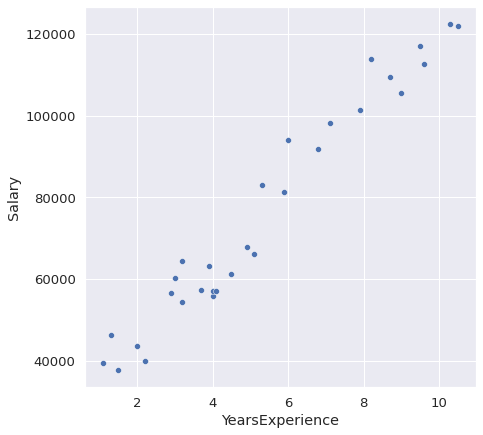

In [6]:
sns.scatterplot(x=salaries['YearsExperience'],y=salaries['Salary'])
plt.show()

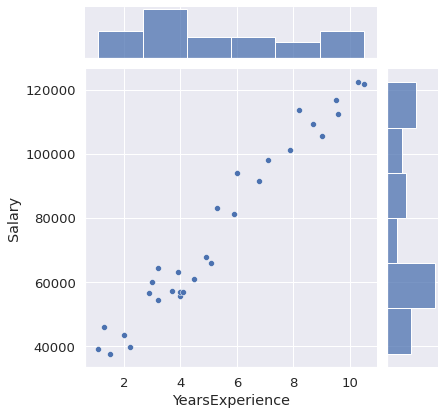

In [7]:
sns.jointplot(x=salaries['YearsExperience'],y=salaries['Salary'])
plt.show()

In [71]:
salaries.sample(5)

,YearsExperience,Salary
27,9.6,112635.0
15,4.9,67938.0
18,5.9,81363.0
11,4.0,55794.0
8,3.2,64445.0


## 4- Data Preprocessing

In [8]:
X=salaries.iloc[ :,:-1].values
y=salaries.iloc[:,-1].values

In [73]:
print(X.shape)
print(y.shape)
print(type(y))

(7906, 41)
(7906,)
<class 'numpy.ndarray'>


## 5- Train Model

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
print(X_train.shape,'\n',X_test.shape,'\n',y_train.shape,'\n',y_test.shape)

(21, 1) 
 (9, 1) 
 (21,) 
 (9,)


In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
regessor=LinearRegression()
regessor.fit(X_train,y_train)

LinearRegression()

## 6- Test Model on `x_test`

In [78]:
y_pred=regessor.predict(X_test)
#print(y_pred)
prediction = pd.DataFrame({'Experiance': [i[0] for i in X_test], 'Predicted Salary': y_pred})
prediction

,Experiance,Predicted Salary
0,9.6,115573.622884
1,4.9,71679.938782
2,8.2,102498.908470
3,5.3,75415.571471
4,3.2,55803.499851
5,3.7,60473.040713
6,10.3,122110.980090
7,8.7,107168.449332
8,4.0,63274.765230


In [16]:
compare_scores = pd.DataFrame({'Actual Salary': y_test, 'Predicted salary': y_pred})
compare_scores

,Actual Salary,Predicted salary
0,112635.0,115573.622884
1,67938.0,71679.938782
2,113812.0,102498.908470
3,83088.0,75415.571471
4,64445.0,55803.499851
5,57189.0,60473.040713
6,122391.0,122110.980090
7,109431.0,107168.449332
8,56957.0,63274.765230


## 7- Calculate R2 Score

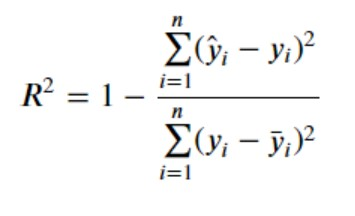

In [17]:
print (regessor.score(X_train,y_train))
print (regessor.score(X_test,y_test))


0.9574526669392872
0.9414466227178214


## 8- Calculate Root Mean Square Error

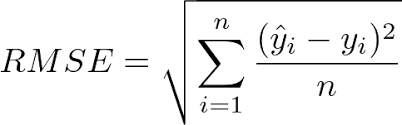

In [18]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
print(f'MSE =  {mse:0.2f}')
print('='*20)
Rmse=np.sqrt(mse)
print(f'RMSE =  {Rmse :0.2f}')

MSE =  37784662.47
RMSE =  6146.92


## 9- Test Model on custom data

In [80]:
print(regessor.predict([[7.5]]))

[95961.55126351]


In [20]:
print(regessor.predict([[15]]))

[166004.66419212]


## 10- Get Model Parameters

In [21]:
print('Slope',regessor.coef_)
print('='*20)
print('Bais',regessor.intercept_)

Slope [9339.08172382]
Bais 25918.438334893202


## 11- Visualize Model

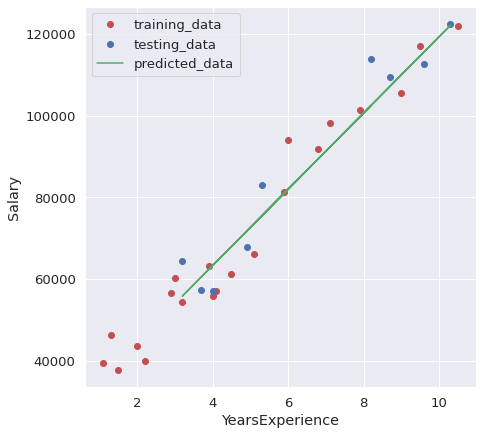

In [22]:
plt.plot(X_train, y_train, 'ro', label='training_data')
plt.plot(X_test, y_test, 'bo', label='testing_data')
plt.plot(X_test, y_pred, 'g-', label='predicted_data')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend()
plt.show()

# <u><center>Multiple Linear Regression

## Import Necssaries Libraries 

In [23]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Understanding the DataFrame

In [24]:
df=pd.read_csv('Cars_Details.csv')

In [25]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [26]:
# shape of the data
df.shape

(8128, 13)

In [27]:
# information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [28]:
#number of distinct elements
df.nunique()

name             2058
year               29
selling_price     677
km_driven         921
fuel                4
seller_type         3
transmission        2
owner               5
mileage           393
engine            121
max_power         322
torque            441
seats               9
dtype: int64

#### get value count for Categorical Variables

In [29]:
df.fuel.value_counts()

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64

In [30]:
df.seller_type.value_counts()

Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: seller_type, dtype: int64

In [31]:
df.transmission.value_counts()

Manual       7078
Automatic    1050
Name: transmission, dtype: int64

In [32]:
df.owner.value_counts()

First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64

In [33]:
df.seats.value_counts()

5.0     6254
7.0     1120
8.0      236
4.0      133
9.0       80
6.0       62
10.0      19
2.0        2
14.0       1
Name: seats, dtype: int64

In [34]:
# description of the data
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


#### Exploratory Data analysis 

In [35]:
df.sample(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
7749,Toyota Fortuner 4x2 Manual,2014,1380000,150000,Diesel,Individual,Manual,First Owner,13.0 kmpl,2982 CC,168.5 bhp,343Nm@ 1400-3400rpm,7.0
7621,Tata Nexon 1.2 Revotron XM,2018,700000,35000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1198 CC,108.5 bhp,170Nm@ 1750-4000rpm,5.0


In [36]:
df['age']=2022-df['year']
df.drop('year', axis=1, inplace=True)

In [37]:
df.sample(5)

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,age
2222,Hyundai i20 1.4 Magna AT,700000,42000,Petrol,Individual,Automatic,First Owner,18.6 kmpl,1368 CC,98.63 bhp,132.3Nm@ 4000rpm,5.0,4
477,Ford Fiesta Titanium 1.5 TDCi,300000,60000,Diesel,Individual,Manual,Second Owner,23.5 kmpl,1498 CC,90 bhp,204Nm@ 2000-2750rpm,5.0,9
5248,Jeep Wrangler 2016-2019 3.6 4X4,4100000,17000,Petrol,Individual,Automatic,First Owner,9.5 kmpl,3604 CC,280 bhp,347Nm@ 4300rpm,5.0,5
1656,Honda City i DTEC VX,819999,200000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0,8
5213,Chevrolet Beat LT,140000,60000,Petrol,Individual,Manual,First Owner,18.6 kmpl,1199 CC,79.4 bhp,108Nm@ 4400rpm,5.0,12


In [38]:
df.isnull().sum()

name               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
age                0
dtype: int64

In [39]:
df.dropna(inplace=True)

In [40]:
# Split num from object column
def splitNum(x):
    x=str(x)
    x= x.split(' ')[0]
    return float(x)

In [41]:
df['mileage'] = df['mileage'].apply(splitNum)



df['engine']=df['engine'].apply(splitNum)

df['max_power']=df['max_power'].apply(splitNum)

In [43]:
#df[df.selling_price > df.selling_price.quantile(0.99)]

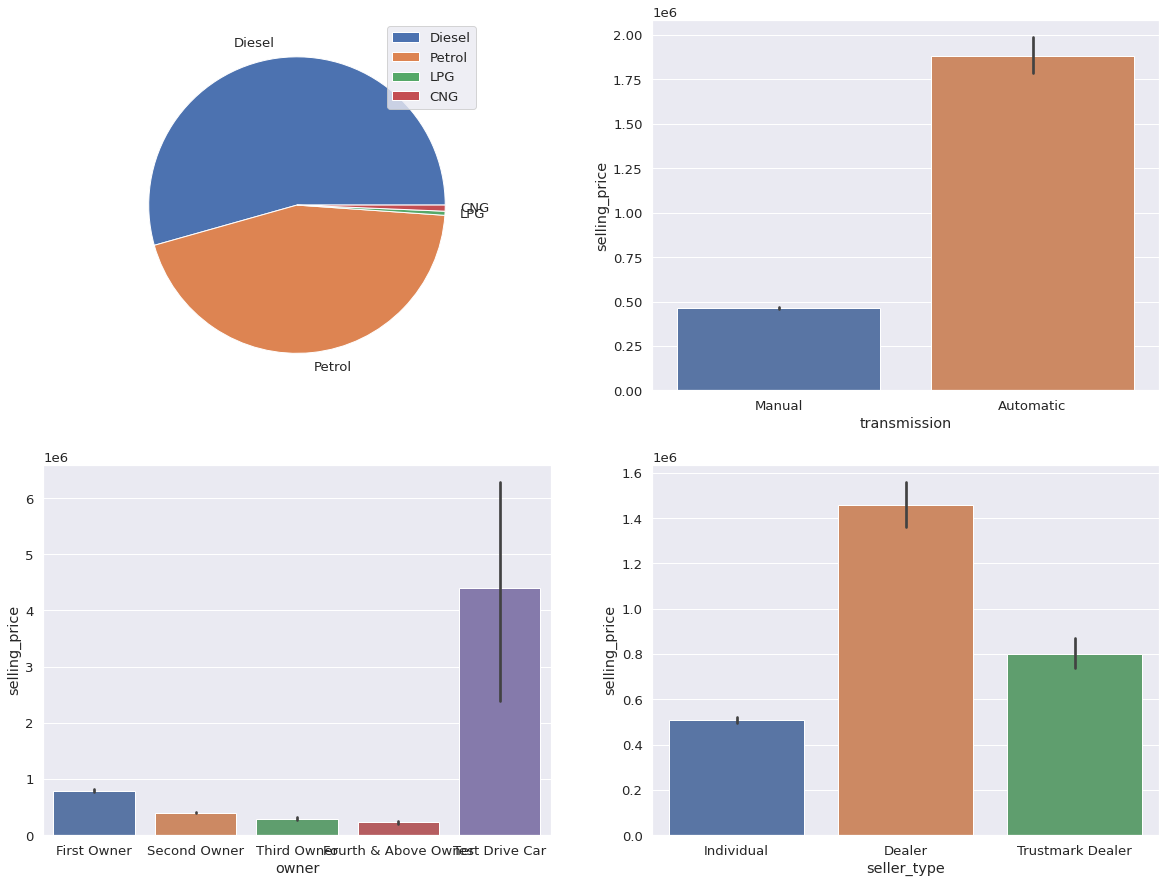

In [44]:
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
diesel = df.fuel[df['fuel'] == 'Diesel'].count()
petrol = df.fuel[df['fuel'] == 'Petrol'].count()
lpg = df.fuel[df['fuel'] == 'LPG'].count()
cng = df.fuel[df['fuel'] == 'CNG'].count()
plt.pie([diesel, petrol, lpg, cng], labels=['Diesel', 'Petrol', 'LPG', 'CNG'])
plt.legend()

plt.subplot(2,2,2)
sns.barplot(x='transmission', y='selling_price', data=df)

plt.subplot(2,2,3)
sns.barplot(x='owner', y='selling_price', data=df)

plt.subplot(2,2,4)
sns.barplot(x='seller_type', y='selling_price', data=df)


plt.show()

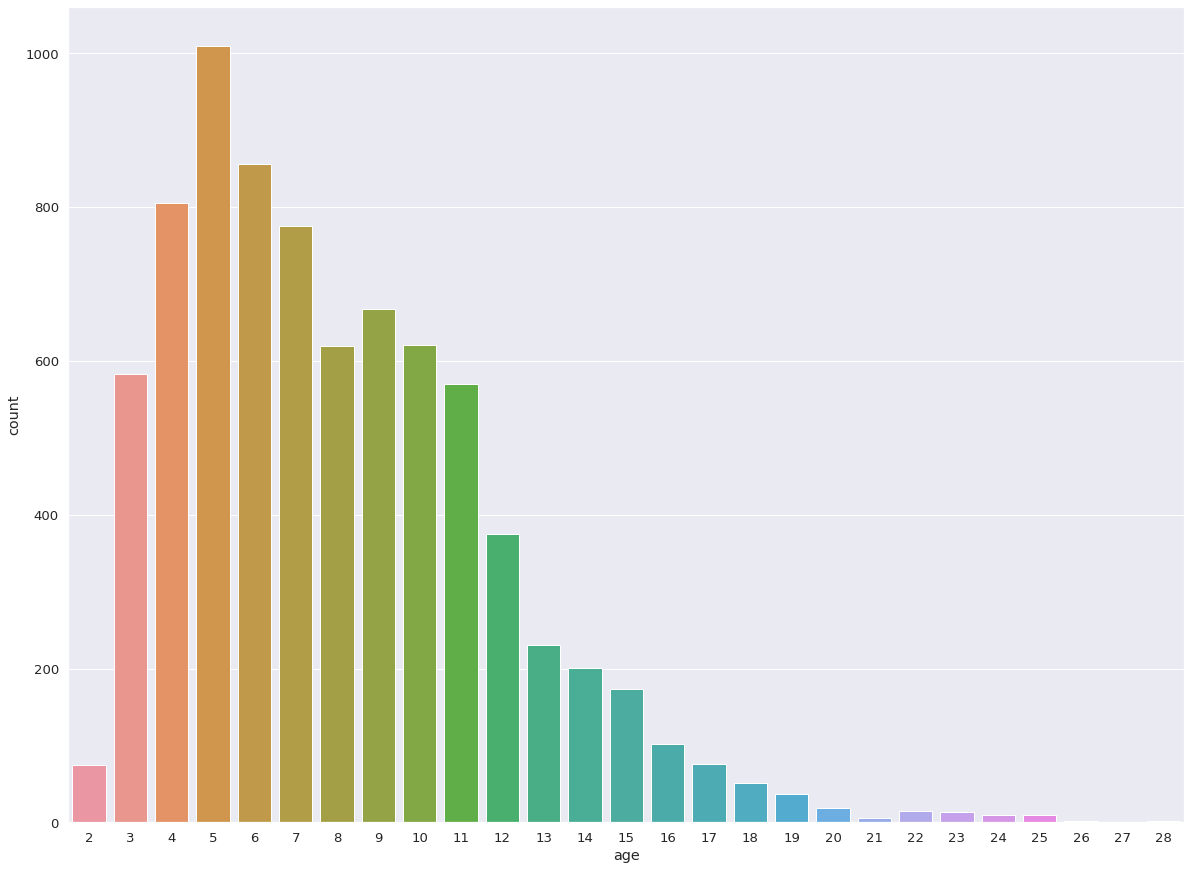

In [45]:
plt.figure(figsize=(20,15))
sns.countplot(x='age', data=df)
plt.show()

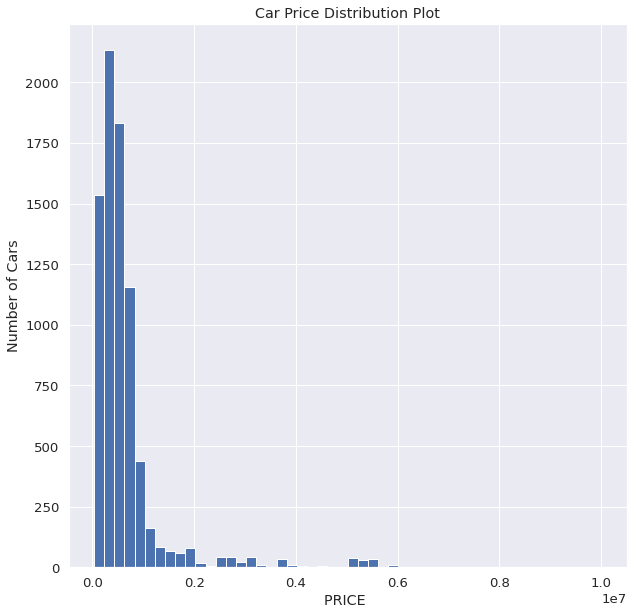

In [46]:
plt.figure(figsize=(10,10))
#plot the histogram
plt.hist(df.selling_price,bins=50)
#label the axes
plt.title('Car Price Distribution Plot')
plt.xlabel('PRICE ')
plt.ylabel('Number of Cars')
plt.show()

In [47]:
df.drop('torque',axis=1,inplace=True)

In [48]:
df.sample(5)

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
779,Hyundai Grand i10 Sportz,500000,20000,Petrol,Individual,Manual,First Owner,18.90,1197.0,82.0,5.0,5
2509,Hyundai Verna 1.6 CRDI,580000,56000,Diesel,Individual,Manual,First Owner,22.32,1582.0,126.3,5.0,8
1091,BMW X4 M Sport X xDrive20d,5400000,7500,Diesel,Dealer,Automatic,First Owner,16.78,1995.0,190.0,5.0,3
612,Maruti Alto 800 LXI,200000,24000,Petrol,Individual,Manual,First Owner,22.74,796.0,47.3,5.0,9
3457,Chevrolet Spark 1.0 LS,150000,80000,Petrol,Individual,Manual,Second Owner,18.00,995.0,62.0,5.0,13


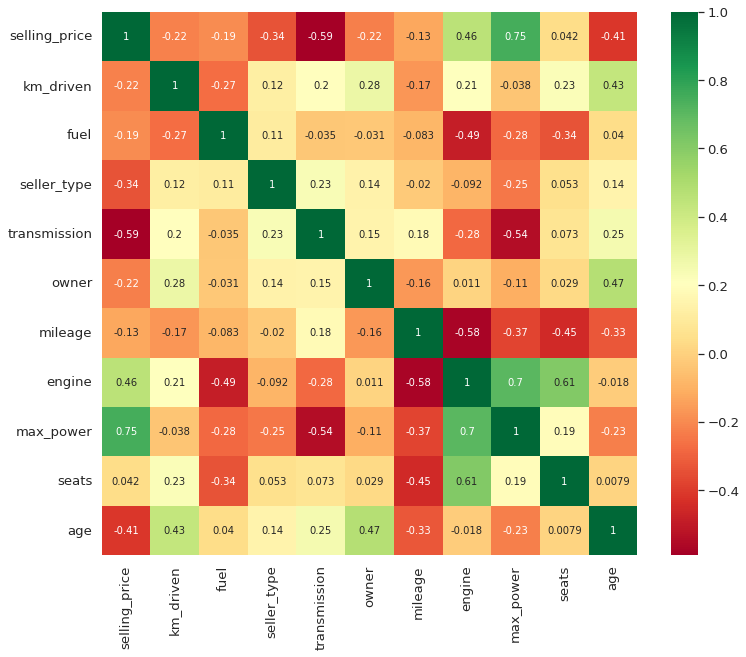

In [87]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True,cmap='RdYlGn')#, annot=True,cmap='RdYlGn'
plt.show()

In [52]:
def getCarName(carname):
    carname=carname.split(' ')
    return f'{carname[0]}'               # {carname[1]} {carname[2]}
df.name=df.name.apply(getCarName)

In [88]:
df.sample(10)

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
3852,Hyundai,550000,330000,3,1,1,2,13.44,2359.0,198.25,5.0,10
3366,Hyundai,530000,120000,3,1,1,2,17.19,1197.0,81.86,5.0,6
7737,Chevrolet,110000,60000,3,1,1,2,18.60,1199.0,79.40,5.0,12
4413,Mahindra,430000,120000,1,1,1,2,12.05,2179.0,120.00,8.0,11
1622,Tata,152000,80000,1,1,1,0,17.00,1405.0,71.00,5.0,11
476,Maruti,610000,21000,3,1,1,0,16.02,1373.0,93.70,7.0,8
2785,Maruti,112999,80000,3,1,1,4,19.70,796.0,46.30,5.0,14
5310,Honda,670000,5000,3,1,1,0,19.50,1199.0,88.76,5.0,3
6139,Hyundai,250000,44588,3,0,1,0,21.10,814.0,55.20,5.0,10
831,Hyundai,95000,100000,3,1,1,2,17.80,1086.0,63.00,5.0,15


In [54]:
# One hot encoder 
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
# X = np.array(ct.fit_transform(X))


dummies = pd.get_dummies(df.name)
dummies.head()

,Ambassador,Ashok,Audi,BMW,Chevrolet,Daewoo,Datsun,Fiat,Force,Ford,...,Mercedes-Benz,Mitsubishi,Nissan,Opel,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df1 = pd.concat([df , dummies], axis=1)
df1.sample()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,...,Mercedes-Benz,Mitsubishi,Nissan,Opel,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
1790,Hyundai,380000,80000,3,1,1,2,16.2,1599.0,103.2,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df1.drop('name',axis=1,inplace=True)

In [57]:
df1.sample()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,...,Mercedes-Benz,Mitsubishi,Nissan,Opel,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
432,840000,120000,1,1,1,2,12.99,2494.0,100.6,7.0,...,0,0,0,0,0,0,0,1,0,0


In [58]:
# X for features y for target
y=df1.iloc[:,0].values
X=df1.iloc[:,1:].values

In [59]:
print(f"X_Shape :: {X.shape}")
print(f"y_Shape :: {y.shape}")

X_Shape :: (7906, 41)
y_Shape :: (7906,)


In [60]:
# Spliting the data into Training and Testing data
from sklearn.model_selection import train_test_split
Xtrain ,Xtest,ytrain,ytest=train_test_split(X,y,test_size=.25,random_state=20201)

In [61]:
Xtrain.shape

(5929, 41)

In [89]:
Xtest.shape

(1977, 41)

## <u>Build your Regression Model

In [63]:
# Train Model
from sklearn.linear_model import LinearRegression
l_reg=LinearRegression()
l_reg.fit(Xtrain,ytrain)

LinearRegression()

In [92]:
# Test model
y_predict=l_reg.predict(Xtest)
pred_df = pd.DataFrame({ 'Predicted Salary': [k for k in y_predict]})
pred_df.T

,0,1,2,3,4,5,6,7,8,9,...,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976
Predicted Salary,794150.249037,667778.070123,485093.627142,475822.199347,2.129984e+06,2.740915e+06,1.609066e+06,337750.209023,483449.00802,754750.307617,...,398901.814314,204355.1772,780062.974763,612890.873602,259079.801132,437901.981462,570381.627409,142560.055341,160836.173358,25128.059195


In [93]:
# compere your real salary with predict
compare_price = pd.DataFrame({'Actual Salary': ytest, 'Predicted salary': y_predict})
compare_price.T

,0,1,2,3,4,5,6,7,8,9,...,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976
Actual Salary,834000.000000,575000.000000,459999.000000,350000.000000,1.850000e+06,1.898999e+06,1.516000e+06,325000.000000,465000.00000,1.150000e+06,...,400000.000000,175000.0000,600000.000000,500000.000000,362000.000000,370000.000000,550000.000000,190000.000000,135000.000000,180000.000000
Predicted salary,794150.249037,667778.070123,485093.627142,475822.199347,2.129984e+06,2.740915e+06,1.609066e+06,337750.209023,483449.00802,7.547503e+05,...,398901.814314,204355.1772,780062.974763,612890.873602,259079.801132,437901.981462,570381.627409,142560.055341,160836.173358,25128.059195


# R2 score

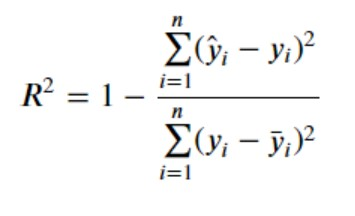

In [66]:
print (f'Train accuracy :: {l_reg.score(Xtrain,ytrain)*100} %')
print (f'Test  accuracy :: {l_reg.score(Xtest,ytest)*100} %')

Train accuracy :: 84.26522852709192 %
Test  accuracy :: 85.24520399392182 %


## Root Mean Square Error

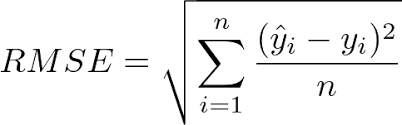

In [67]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(ytest,y_predict)
print(f'MSE =  {mse:0.2f}')
print('='*20)
Rmse=np.sqrt(mse)
print(f'RMSE =  {Rmse :0.2f}')

MSE =  101935532753.41
RMSE =  319273.45


In [68]:
print(l_reg.coef_)

[-1.19421294e+00 -4.15898897e+04 -4.05324618e+04 -1.07893786e+05
 -9.98807074e+03 -1.75641528e+03  7.17797946e+01  6.30824396e+03
 -1.61196625e+03 -4.18628416e+04 -1.69782271e+05 -4.81388840e+05
  7.26010585e+05  1.97513045e+06 -6.52194745e+05 -6.46908346e+04
 -6.68356415e+05 -6.33827803e+05 -5.36390195e+05 -5.59922690e+05
 -5.68933948e+05 -5.64342903e+05  2.24890139e+04  8.90262028e+05
  1.58736622e+05 -5.37506275e+04  1.38466385e+06  2.86243243e+06
 -4.16277056e+04 -5.49726497e+05 -4.76766496e+05  4.81634942e+05
 -3.28150158e+05 -5.75571567e+05 -1.29297892e+05 -5.82194311e+05
 -5.81181625e+05 -6.65821183e+05 -2.39857001e+05 -6.26833309e+05
  1.24924909e+06]


In [69]:
print(l_reg.intercept_)

1077147.6880142065
